# Extract, Analyze, and Translate Text from Images with the Cloud ML APIs

GSP075

https://www.cloudskillsboost.google/focuses/1836?parent=catalog&qlcampaign=1p-EDUCR-SG-2021-MAJULAHGCP-2-25

### Overview
In this lab, we'll explore the power of machine learning by using multiple machine learning APIs together. We'll start with the Cloud Vision API's text detection method to make use of Optical Character Recognition (OCR) to extract text from images. Then we'll learn how to translate that text with the Translation API and analyze it with the Natural Language API.

What you'll learn
- Creating a Vision API request and calling the API with curl
- Using the text detection (OCR) method of the Vision API
- Using the Translation API to translate text from your image
- Using the Natural Language API to analyze the text

# Activate Cloud Shell

Cloud Shell is a virtual machine that is loaded with development tools. It offers a persistent 5GB home directory and runs on the Google Cloud. Cloud Shell provides command-line access to your Google Cloud resources.

In the Cloud Console, in the top right toolbar, click the `Activate Cloud Shell` button.

`gcloud` is the command-line tool for Google Cloud. It comes pre-installed on Cloud Shell and supports tab-completion.

You can list the active account name with this command:

In [ ]:
gcloud auth list

You can list the project ID with this command:

In [ ]:
gcloud config list project

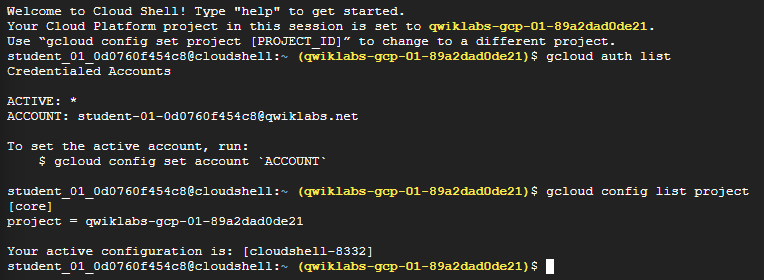

# Create an API Key

Since you'll be using `curl` to send a request to the Vision API, you'll need to generate an API key to pass in your request URL. To create an API key, navigate to:

`Navigation Menu` > `APIs & services` > `Credentials`. Click `+ Create Credentials`.

In the drop down menu, select `API key`.

Next, copy the key you just generated. Click `Close`.

Now save the API key to an environment variable to avoid having to insert the value of your API key in each request.

Run the following in Cloud Shell, replacing <your_api_key> with the key you just copied.

In [ ]:
export API_KEY=<YOUR_API_KEY>

# Upload image to a cloud storage bucket

### Creating a Cloud Storage bucket

There are two ways to send an image to the Vision API for image detection: by sending the API a base64 encoded image string, or passing it the URL of a file stored in Cloud Storage. For this lab you'll create a Cloud Storage bucket to store your images.

Navigate to the `Navigation menu` > `Cloud Storage` browser in the Console. 

Then click `Create bucket`.

Give your bucket a globally unique name and click on `Choose how to control access to objects`.

Uncheck the box for `Enforce public access prevention on this bucket`.

Choose `Fine-grained` under Access Control and click `Create`.

### Upload image to your bucket

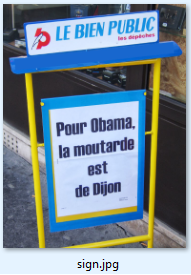

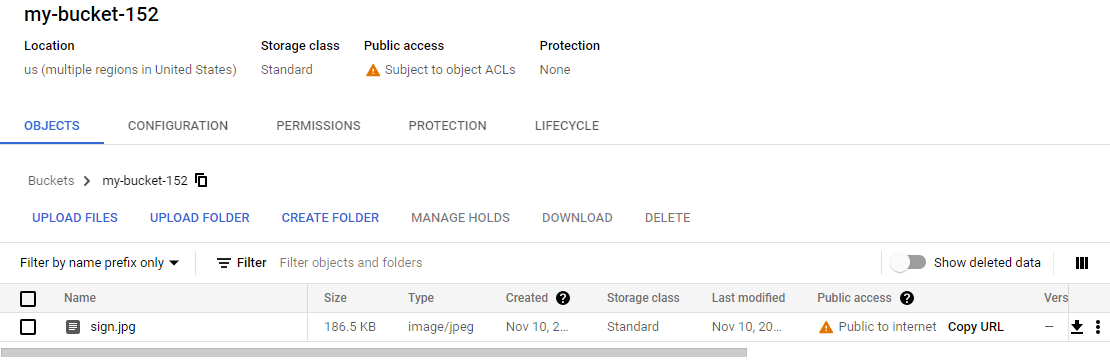

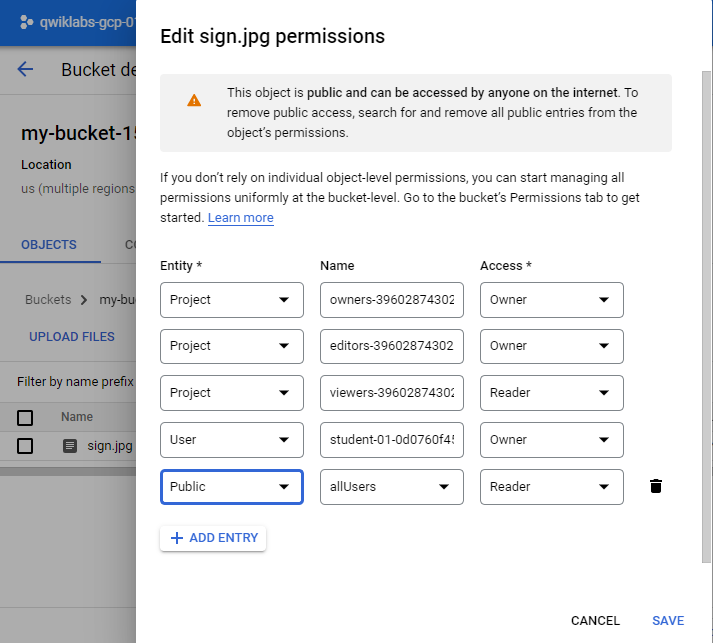

# Create Vision API request
In your Cloud Shell environment, create an `ocr-request.json` files, then add the code below to the file, replacing `my-bucket-name` with the name of the bucket you created. You can create the file using one of your preferred command line editors (`nano`, `vim`, `emacs`) or click the pencil icon to open the code editor in Cloud Shell.

Add the following to `ocr-request.json` file. 

You're going to use the `TEXT_DETECTION` feature of the Vision API. This will run optical character recognition (OCR) on the image to extract text.

In [ ]:
{
  "requests": [
      {
        "image": {
          "source": {
              "gcsImageUri": "gs://my-bucket-name/sign.jpg"
          }
        },
        "features": [
          {
            "type": "TEXT_DETECTION",
            "maxResults": 10
          }
        ]
      }
  ]
}

# Call the Vision API's text detection method

In Cloud Shell, call the Vision API with `curl`:

In [ ]:
curl -s -X POST -H "Content-Type: application/json" --data-binary @ocr-request.json  https://vision.googleapis.com/v1/images:annotate?key=${API_KEY}

The first part of the response should look like the following:

In [ ]:
{
  "responses": [
    {
      "textAnnotations": [
        {
          "locale": "fr",
          "description": "LE BIEN PUBLIC\nles dépêches\nPour Obama,\nla moutarde\nest\nde Dijon\n",
          "boundingPoly": {
            "vertices": [
              {
                "x": 138,
                "y": 40
              },
              {
                "x": 622,
                "y": 40
              },
              {
                "x": 622,
                "y": 795
              },
              {
                "x": 138,
                "y": 795
              }
            ]
          }
        },
        {
          "description": "LE",
          "boundingPoly": {
            "vertices": [
              {
                "x": 138,
                "y": 99
              },
              {
                "x": 274,
                "y": 82
              },
              {
                "x": 283,
                "y": 157
              },
              {
                "x": 147,
                "y": 173
              }
            ]
          }
        },
        {
          "description": "BIEN",
          "boundingPoly": {
            "vertices": [
              {
                "x": 291,
                "y": 79
              },
              {
                "x": 413,
                "y": 64
              },
              {
                "x": 422,
                "y": 139
              },
              {
                "x": 300,
                "y": 154
              }
            ]
          }
            ...
      ]
}]
}

The OCR method is able to extract lots of text from our image, cool! Let's break down the response. The first piece of data you get back from `textAnnotations` is the entire block of text the API found in the image. This includes the language code (in this case fr for French), a string of the text, and a bounding box indicating where the text was found in our image. Then you get an object for each word found in the text with a bounding box for that specific word.

Note: The Vision API also has a `DOCUMENT_TEXT_DETECTION` feature optimized for images with more text. This response includes additional information and breaks text down into page, blocks, paragraphs, and words.

Unless you speak French you probably don't know what this says. The next step is translation.

Run the following `curl` command to save the response to an `ocr-response.json` file so it can be referenced later:

In [ ]:
curl -s -X POST -H "Content-Type: application/json" --data-binary @ocr-request.json  https://vision.googleapis.com/v1/images:annotate?key=${API_KEY} -o ocr-response.json

# Sending text from the image to the Translation API

The Translation API can translate text into 100+ languages. It can also detect the language of the input text. To translate the French text into English, all you need to do is pass the text and the language code for the target language (en-US) to the Translation API.

First, create a `translation-request.json` file and add the following to it. `q` is where you'll pass the string to translate.

Save the file.

In [ ]:
{
  "q": "your_text_here",
  "target": "en"
}

Run this Bash command in Cloud Shell to extract the image text from the previous step and copy it into a new `translation-request.json` (all in one command):

In [ ]:
STR=$(jq .responses[0].textAnnotations[0].description ocr-response.json) && STR="${STR//\"}" && sed -i "s|your_text_here|$STR|g" translation-request.json

Now you're ready to call the Translation API. This command will also copy the response into a `translation-response.json` file:

In [ ]:
curl -s -X POST -H "Content-Type: application/json" --data-binary @translation-request.json https://translation.googleapis.com/language/translate/v2?key=${API_KEY} -o translation-response.json

Run this command to inspect the file with the Translation API response:

In [ ]:
cat translation-response.json

Awesome, you can understand more of what the sign said!

In [ ]:
{
  "data": {
    "translations": [
      {
        "translatedText": "TO THE PUBLIC GOOD the dispatches For Obama, the mustard is from Dijon",
        "detectedSourceLanguage": "fr"
      }
    ]
  }
}

In the response, `translatedText` contains the resulting translation, and `detectedSourceLanguage` is `fr`, the ISO language code for French. The Translation API supports 100+ languages, all of which are listed [here](https://cloud.google.com/translate/docs/languages).

In addition to translating the text from our image, you might want to do more analysis on it. That's where the Natural Language API comes in handy. Onward to the next step!

# Analyzing the image's text with the Natural Language API

The Natural Language API helps us understand text by extracting entities, analyzing sentiment and syntax, and classifying text into categories. Use the `analyzeEntities` method to see what entities the Natural Language API can find in the text from your image.

To set up the API request, create a `nl-request.json` file with the following:

In [ ]:
{
  "document":{
    "type":"PLAIN_TEXT",
    "content":"your_text_here"
  },
  "encodingType":"UTF8"
}

In the request, you're telling the Natural Language API about the text you're sending:

**type**: Supported type values are `PLAIN_TEXT` or `HTML`.

**content**: pass the text to send to the Natural Language API for analysis. The Natural Language API also supports sending files stored in Cloud Storage for text processing. To send a file from Cloud Storage, you would replace `content` with `gcsContentUri` and use the value of the text file's uri in Cloud Storage.

**encodingType**: tells the API which type of text encoding to use when processing the text. The API will use this to calculate where specific entities appear in the text.

Run this Bash command in Cloud Shell to copy the translated text into the content block of the Natural Language API request:

In [ ]:
STR=$(jq .data.translations[0].translatedText  translation-response.json) && STR="${STR//\"}" && sed -i "s|your_text_here|$STR|g" nl-request.json

The `nl-request.json` file now contains the translated English text from the original image. Time to analyze it!

Call the `analyzeEntities` endpoint of the Natural Language API with this `curl` request:

In [ ]:
curl "https://language.googleapis.com/v1/documents:analyzeEntities?key=${API_KEY}" \
  -s -X POST -H "Content-Type: application/json" --data-binary @nl-request.json

If you scroll through the response you can see the entities the Natural Language API found:

In [ ]:
{
  "entities": [
    {
      "name": "dispatches",
      "type": "OTHER",
      "metadata": {},
      "salience": 0.3560996,
      "mentions": [
        {
          "text": {
            "content": "dispatches",
            "beginOffset": 23
          },
          "type": "COMMON"
        }
      ]
    },
    {
      "name": "mustard",
      "type": "OTHER",
      "metadata": {},
      "salience": 0.2878307,
      "mentions": [
        {
          "text": {
            "content": "mustard",
            "beginOffset": 38
          },
          "type": "COMMON"
        }
      ]
    },
    {
      "name": "Obama",
      "type": "PERSON",
      "metadata": {
        "mid": "/m/02mjmr",
        "wikipedia_url": "https://en.wikipedia.org/wiki/Barack_Obama"
      },
      "salience": 0.16260329,
      "mentions": [
        {
          "text": {
            "content": "Obama",
            "beginOffset": 31
          },
          "type": "PROPER"
        }
      ]
    },
    {
      "name": "Dijon",
      "type": "LOCATION",
      "metadata": {
        "mid": "/m/0pbhz",
        "wikipedia_url": "https://en.wikipedia.org/wiki/Dijon"
      },
      "salience": 0.08129317,
      "mentions": [
        {
          "text": {
            "content": "Dijon",
            "beginOffset": 54
          },
          "type": "PROPER"
        }
      ]
    }
  ],
  "language": "en"
}

For entities that have a wikipedia page, the API provides metadata including the URL of that page along with the entity's `mid`. The `mid` is an ID that maps to this entity in Google's Knowledge Graph. To get more information on it, you could call the [Knowledge Graph API](https://developers.google.com/knowledge-graph/), passing it this ID. For all entities, the Natural Language API tells us the places it appeared in the text (`mentions`), the `type` of entity, and `salience` (a [0,1] range indicating how important the entity is to the text as a whole). In addition to English, the Natural Language API also supports the languages listed [here](https://cloud.google.com/natural-language/docs/languages).

Looking at this image it's relatively easy for us to pick out the important entities, but if we had a library of thousands of images this would be much more difficult. OCR, translation, and natural language processing can help to extract meaning from large datasets of images.

# Congratulations!
You've learned how to combine 3 different machine learning APIs: the Vision API's OCR method extracted text from an image, then the Translation API translated that text to English and the Natural Language API to found entities in that text.

### What was covered
- Use cases for combining multiple machine learning APIs
- Creating a Vision API OCR request and calling the API with curl
- Translating text with the Translation API
- Extract entities from text with the Natural Language API